<a href="https://colab.research.google.com/github/Nithya9404/Healthcare_analytics/blob/main/Birthweight_of_baby_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Collection**

This is a pregnancy dataset which is used to predict the birth weight of the baby using the parameters such as mother's_age,gestation period. The dataset is obtained from kaggle. The data set can be found in https://www.kaggle.com/datasets/debjeetdas/babies-birth-weight


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets/datasets/babies.csv')
data.head(4)

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


**Terms related to the dataset**

case : Individual id number of the patient

bwt  : birthweight of the baby

gestation : gestation period of the mother

partity : Indicates whether first pregnancy or not

age : mother's age

height : mother's height

weight: mother's weight

smoke: Indicates whether mother smoke or not

**Data Preparation**

In [ ]:
data.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [ ]:
data.isna().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

We can find null values in the columns gestation,age,height,weight,smoke. It is very important to remove these null values or else it may adversely affect the analysis

In [ ]:
mean = data['gestation'].mean()
data['gestation'] = data['gestation'].fillna(mean)

mean_age = data['age'].mean()
data['age'] = data['age'].fillna(mean_age)

mean_weight = data['weight'].mean()
data['weight'] = data['weight'].fillna(mean_weight)

mean_height = data['height'].mean()
data['height'] = data['height'].fillna(mean_height)

In [ ]:
data.isna().sum()

case          0
bwt           0
gestation     0
parity        0
age           0
height        0
weight        0
smoke        10
dtype: int64

In [ ]:
data = data.dropna(subset=['smoke'])

In [ ]:
data.isna().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

**Feature Selection**

In [ ]:
correlations = data.corr()['bwt']
print(correlations)

case        -0.059471
bwt          1.000000
gestation    0.403183
parity      -0.044566
age          0.029631
height       0.199870
weight       0.153131
smoke       -0.240093
Name: bwt, dtype: float64


In [ ]:
selected_features = data[['gestation', 'height', 'weight', 'bwt']]
selected_features = selected_features.drop(columns=['bwt'])
print(selected_features.head())

    gestation  height  weight
0  284.000000    62.0   100.0
1  282.000000    64.0   135.0
2  279.000000    64.0   115.0
3  279.338512    69.0   190.0
4  282.000000    67.0   125.0


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

data = selected_features.to_numpy()
X = data[:, :-1]  # Features (gestation, height, weight)
y = data[:, -1]   # Target (bwt)

k = 2
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
print("Indices of selected features:", selected_feature_indices)


Indices of selected features: [0 1]


**Building the CNN model**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout

# Assuming you have 'selected_features' DataFrame with 'gestation,' 'weight,' and 'bwt'
# Convert the DataFrame to a NumPy array
data = selected_features.to_numpy()

# Separate the input features (X) and target variable (y)
X = data[:, selected_feature_indices]  # Only include the selected features
y = data[:, -1]  # Target (bwt)

# Create a Feedforward Neural Network (FNN) model for regression
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(selected_feature_indices),)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X, y, epochs=50, batch_size=32)

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f'Mean Squared Error: {loss}')
print(f'Mean Absolute Error: {mae}')


Epoch 1/50
39/39 [==============================] - 2s 3ms/step - loss: 9966.9736 - mae: 79.3242
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 2972.7815 - mae: 43.5871
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 2496.2917 - mae: 40.4108
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 2312.8931 - mae: 38.0858
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 2305.5259 - mae: 38.2886
Epoch 6/50
39/39 [==============================] - 0s 3ms/step - loss: 2397.5579 - mae: 39.1525
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 2217.7019 - mae: 37.5460
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 2197.5994 - mae: 37.3415
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 2200.8281 - mae: 37.2200
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 2155.9497 - mae: 36.9201
Epoch 11/50
39/39 [==========

In [ ]:
X

array([[284.,  62.],
       [282.,  64.],
       [279.,  64.],
       ...,
       [291.,  65.],
       [281.,  65.],
       [297.,  65.]])

In [ ]:
new_data = np.array([
    [280,65.0],
    [270,68.0],
    [290,62.0]
])

predictions = model.predict(new_data)
for i,prediction in enumerate(predictions):
  print(f"Prediction for new data point {i+1}: {prediction[0]/35.27}kgs")

1/1 [==============================] - 0s 346ms/step
Prediction for new data point 1: 3.154096395191336kgs
Prediction for new data point 2: 3.1691444944247054kgs
Prediction for new data point 3: 3.139047863329981kgs


**Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets/babies.csv')
df.head(3)

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0


In [ ]:
df.drop('case',axis=1,inplace=True)

In [ ]:
df.columns

Index(['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke'], dtype='object')

<Axes: >

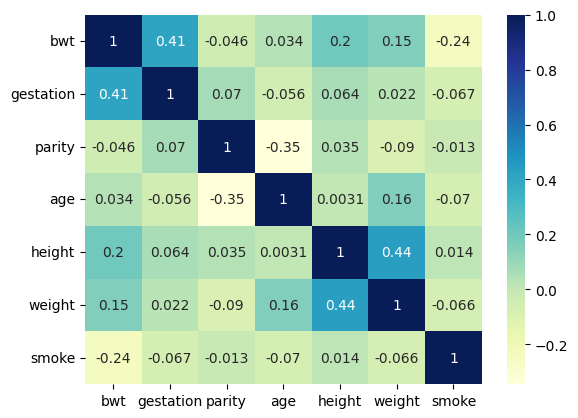

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

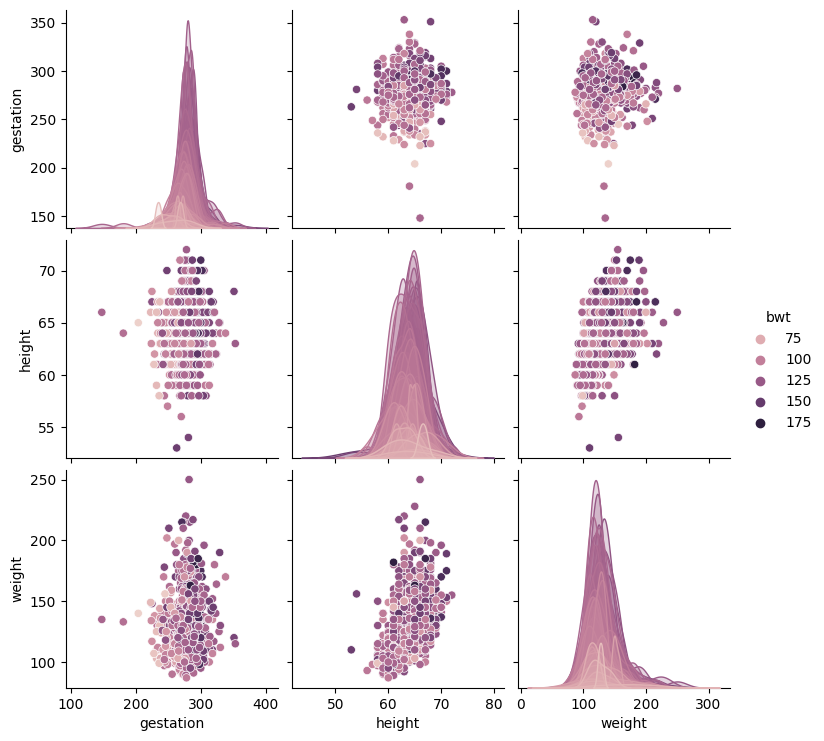

In [ ]:
features = df[['bwt','gestation','height','weight']]
sns.pairplot(features,hue='bwt')

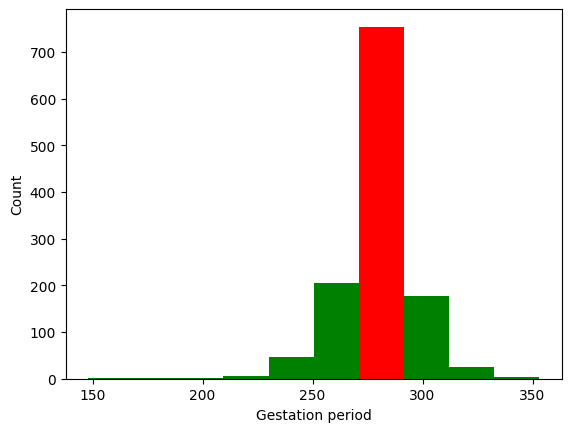

In [ ]:
counts, bins, patches = plt.hist(features['gestation'], color='green')
plt.ylabel('Count')
plt.xlabel('Gestation period')

index_of_highest_count = counts.argmax()
patches[index_of_highest_count].set_fc('red')

plt.show()